In [2]:
!pip install loguru

  Using cached loguru-0.6.0-py3-none-any.whl (58 kB)
  Using cached win32_setctime-1.1.0-py3-none-any.whl (3.6 kB)


In [30]:
import torch

from loguru import logger

In [56]:
import sys
sys.path.append('d:\\Class\\23Spring\\CS577\\CS577-NLP\\HW2')

In [169]:
from torch.utils.data import Dataset
import pandas as pd

# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
class WiCDataset(Dataset):

    def __init__(self, data_path, label_path):
        self.data_path = data_path
        self.label_path = label_path

        # Read the csv files from certain file path
        self.data = pd.read_csv(data_path, sep='\t',header=None,\
                                    names=["Target", "POS", "index1-2", "example1", "example2"])
        self.label = pd.read_csv(label_path, sep='\t', header=None,\
                                    names=["Label"])
        self.inputs = 0

    def __len__(self):
        if len(self.data) == len(self.label):
            return len(self.data)
        else:
            raise AssertionError(f"File sizes do not match each other: {self.data_path.split('/')[-1]}, {self.label_path.split('/')[-1]}")
    
    def __head__(self):
        return self.data.head()
    
    def __getitem__(self, idx, input):
        target = self.data.loc[idx, "Target"]
        POS = self.data.loc[idx, "POS"]
        index1, index2 = self.data.loc[idx, "index1-2"].split("-")
        context1 = self.data.loc[idx, "example1"]
        context2 = self.data.loc[idx, "example2"]

        label = self.label.loc[idx, "Label"]

        self.inputs.append(input)
        dic_data = {"label": label, "target": target, "POS": POS, "index1": index1, \
                    "index2": index2, "context1": context1,\
                        "context2": context2, "input": self.inputs[idx]}
        return dic_data

In [170]:
train_data_path = "./WiC_dataset/train/train.data.txt"
train_label_path = "./WiC_dataset/train/train.gold.txt"
train_set = WiCDataset(train_data_path, train_label_path)
print(train_set.__len__())

5428


In [160]:
train_set[0]

{'label': 'F',
 'target': 'carry',
 'POS': 'V',
 'index1': '2',
 'index2': '1',
 'context1': 'You must carry your camping gear .',
 'context2': 'Sound carries well over water .'}

In [149]:
traindata = pd.read_csv(train_data_path, sep='\t',\
                                header=None,\
                                    names=["Target", "POS", "index1-2", "example1", "example2"])

In [150]:
traindata

,Target,POS,index1-2,example1,example2
0,carry,V,2-1,You must carry your camping gear .,Sound carries well over water .
1,go,V,2-6,Messages must go through diplomatic channels .,Do you think the sofa will go through the door ?
2,break,V,0-2,Break an alibi .,The wholesaler broke the container loads into ...
3,cup,N,8-4,He wore a jock strap with a metal cup .,Bees filled the waxen cups with honey .
4,academy,N,1-2,The Academy of Music .,The French Academy .
...,...,...,...,...,...
5423,krona,N,4-8,Piecas kronas — five krona .,Kronas kurss — the exchange rate of the krona .
5424,conflict,N,3-1,The harder the conflict the more glorious the ...,The conflict between the government and the re...
5425,answer,V,0-0,Answer the riddle .,Answer a question .
5426,play,V,0-0,Play the casinos in Trouville .,Play the races .


In [151]:
idx1, idx2 = traindata.loc[0, "index1-2"].split("-")

In [153]:
labeldata = pd.read_csv(train_label_path, sep='\t',\
                                header=None,\
                                    names=["Label"])

__main__.WiCDataset

In [175]:
train_set[0]["input"] = 111
 

{'label': 'F',
 'target': 'carry',
 'POS': 'V',
 'index1': '2',
 'index2': '1',
 'context1': 'You must carry your camping gear .',
 'context2': 'Sound carries well over water .'}

In [28]:
from torch.utils.data import Dataset
import pandas as pd

# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
class WiCDataset(Dataset):

    def __init__(self, data_path, label_path):
        self.data_path = data_path
        self.label_path = label_path

        # Read the csv files from certain file path
        self.data = pd.read_csv(data_path, sep='\t',header=None,\
                                    names=["Target", "POS", "index1-2", "example1", "example2"])
        self.label = pd.read_csv(label_path, sep='\t', header=None,\
                                    names=["Label"])
        self.inputs = [None] * len(self.data)

    def __len__(self):
        if len(self.data) == len(self.label):
            return len(self.data)
        else:
            raise AssertionError(f"File sizes do not match each other: {self.data_path.split('/')[-1]}, {self.label_path.split('/')[-1]}")
    
    def __head__(self):
        return self.data.head()
    
    def __getitem__(self, idx):
        input_value = self.inputs[idx]

        target = self.data.loc[idx, "Target"]
        POS = self.data.loc[idx, "POS"]
        index1, index2 = self.data.loc[idx, "index1-2"].split("-")
        context1 = self.data.loc[idx, "example1"]
        context2 = self.data.loc[idx, "example2"]

        label = self.label.loc[idx, "Label"]
        dic_data = {"label": label, "target": target, "POS": POS, "index1": index1, \
                "index2": index2, "context1": context1,\
                    "context2": context2, "input": input_value}
        return dic_data
    
    def update(self, idx, input_value):
        self.inputs[idx] = input_value
        return


In [29]:
train_data_path = "./WiC_dataset/train/train.data.txt"
train_label_path = "./WiC_dataset/train/train.gold.txt"
train_set = WiCDataset(train_data_path, train_label_path)
print(train_set.__len__())

5428


In [30]:
train_set.__head__()

,Target,POS,index1-2,example1,example2
0,carry,V,2-1,You must carry your camping gear .,Sound carries well over water .
1,go,V,2-6,Messages must go through diplomatic channels .,Do you think the sofa will go through the door ?
2,break,V,0-2,Break an alibi .,The wholesaler broke the container loads into ...
3,cup,N,8-4,He wore a jock strap with a metal cup .,Bees filled the waxen cups with honey .
4,academy,N,1-2,The Academy of Music .,The French Academy .


In [31]:
train_set.update(0, 111)
train_set[0]

{'label': 'F',
 'target': 'carry',
 'POS': 'V',
 'index1': '2',
 'index2': '1',
 'context1': 'You must carry your camping gear .',
 'context2': 'Sound carries well over water .',
 'input': 111}

In [32]:
print(train_set[0]["input"])

111


In [1]:
import gensim.downloader as api


In [2]:
glove_model = api.load("glove-wiki-gigaword-50")

In [11]:
"Do" in glove_model.index_to_key


False

In [13]:
import torch
import torch.nn as nn
import gensim.downloader as api

c:\Users\wenxi\anaconda3\envs\cs577hw2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
embeddings = nn.Embedding(10, 2)

In [6]:
from collections import defaultdict

word_to_idx = defaultdict(lambda: 50)


In [11]:
a = [[1, 1]]
b = [[2, 3]]
(a, b)

([[1, 1]], [[2, 3]])

In [24]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import argparse
import random
random.seed(577)

import numpy as np
np.random.seed(577)

import torch
torch.set_default_tensor_type(torch.FloatTensor)
torch.use_deterministic_algorithms(True)
torch.manual_seed(577)
torch_device = torch.device("cpu")

'''
NOTE: Do not change any of the statements above regarding random/numpy/pytorch.
You can import other built-in libraries (e.g. collections) or pre-specified external libraries
such as pandas, nltk and gensim below. 
Also, if you'd like to declare some helper functions, please do so in utils.py and
change the last import statement below.
'''
import gensim.downloader as api
from collections import defaultdict
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence

from neural_archs import DAN, RNN, LSTM
from utils import WiCDataset


def pad_embeddings(tensor, max_length):
    pad_size = max_length - tensor.shape[1]
    padded_embeddings = F.pad(tensor, (0, 0, 0, pad_size, 0, 0))
    return padded_embeddings


def collate_fn(batch):
    inputs = [item["input"] for item in batch]
    labels = [item["label"] for item in batch]

    padded_inputs = pad_sequence(inputs, batch_first=True)
    labels_tensor = torch.tensor(labels, dtype=torch.float32)

    return padded_inputs, labels_tensor

In [26]:
init_word_embs = "scratch"
neural_arch = "dan"
rnn_bidirect = False

if init_word_embs == "glove":
    # TODO: Feed the GloVe embeddings to NN modules appropriately
    # for initializing the embeddings
    glove_embs = api.load("glove-wiki-gigaword-50")
    embedding_dim  = glove_embs.vector_size
    vocab_size = len(glove_embs)
    print(f"Glove Embedding size is {embedding_dim}")

    word_to_idx = {word: idx for idx, word in enumerate(glove_embs.index_to_key)}
    weights = torch.zeros((vocab_size, embedding_dim), dtype=torch.float32)
    embedding = torch.nn.Embedding.from_pretrained(weights, freeze=False)
else:
    word_to_idx = defaultdict(lambda: len(word_to_idx))
    vocab_size = len(word_to_idx)
    embedding_dim = 50
    embedding = torch.nn.Embedding(vocab_size, embedding_dim)

input_size = embedding_dim
hidden_size = 128
output_size = 2

# TODO: Freely modify the inputs to the declaration of each module below
if neural_arch == "dan":
    model = DAN(input_size, hidden_size, output_size).to(torch_device)
elif neural_arch == "rnn":
    # if args.rnn_bidirect:
    model = RNN(input_size, hidden_size, output_size, num_layers=1, bidirectional=rnn_bidirect).to(torch_device)
    # else:
    #     model = RNN().to(torch_device)
elif neural_arch == "lstm":
    # if args.rnn_bidirect:
    model = LSTM(input_size, hidden_size, output_size, num_layers=1, bidirectional=rnn_bidirect).to(torch_device)
    # else:
    #     model = LSTM().to(torch_device)

# TODO: Read off the WiC dataset files from the `WiC_dataset' directory
# (will be located in /homes/cs577/WiC_dataset/(train, dev, test))
# and initialize PyTorch dataloader appropriately
# Take a look at this page
# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
# and implement a PyTorch Dataset class for the WiC dataset in
# utils.py
train_data_path = "./WiC_dataset/train/train.data.txt"
dev_data_path = "./WiC_dataset/dev/dev.data.txt"
test_data_path = "./WiC_dataset/test/test.data.txt"

train_label_path = "./WiC_dataset/train/train.gold.txt"
dev_label_path = "./WiC_dataset/dev/dev.gold.txt"
test_label_path = "./WiC_dataset/test/test.gold.txt"

train_set = WiCDataset(train_data_path, train_label_path)
dev_set = WiCDataset(dev_data_path, dev_label_path)
test_set = WiCDataset(test_data_path, test_label_path)

for dataset in [train_set, dev_set, test_set]:
    for i in range(len(dataset)):
        target = dataset[i]["target"]
        context1 = dataset[i]["context1"]
        context2 = dataset[i]["context2"]      
        
        tokens1 = context1.split()
        tokens2 = context2.split()
        indices1, indices2 =  [], []

        for word in tokens1:
            if word not in word_to_idx:
                word_to_idx[word] = len(word_to_idx)
                new_embedding = torch.rand(1, embedding_dim)
                new_weights = torch.cat((embedding.weight.data, new_embedding))
                embedding = torch.nn.Embedding.from_pretrained(new_weights, freeze=False)
            indices1.append(word_to_idx[word])
        
        for word in tokens2:
            if word not in word_to_idx:
                new_embedding = torch.rand(1, embedding_dim)
                new_weights = torch.cat((embedding.weight.data, new_embedding))
                embedding = torch.nn.Embedding.from_pretrained(new_weights, freeze=False)
            indices2.append(word_to_idx[word])

        embeddings1 = embedding(torch.tensor(indices1)).unsqueeze(0)
        embeddings2 = embedding(torch.tensor(indices2)).unsqueeze(0)
        # print(embeddings1.shape, embeddings2.shape)
        # print(embeddings1, embeddings2)
        # pad shorter embedding to match each other.
        max_length = max(embeddings1.shape[1], embeddings2.shape[1])
        # print(max_length)
        embeddings1 = pad_embeddings(embeddings1, max_length)
        embeddings2 = pad_embeddings(embeddings2, max_length)

        # input = (embeddings1, embeddings2) #TODO: Do I need to concat here?
        # print(embeddings1.shape, embeddings2.shape)
        input = torch.cat((embeddings1, embeddings2), dim=0)
        dataset.update(i, input)
    print(f"Sequences in {dataset} have been initialized!! Len({dataset}) is {len(dataset)}")

train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, collate_fn=collate_fn)
dev_dataloader = torch.utils.data.DataLoader(dev_set, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=True, collate_fn=collate_fn)


Sequences in <utils.WiCDataset object at 0x000001AE1A2F02C8> have been initialized!! Len(<utils.WiCDataset object at 0x000001AE1A2F02C8>) is 5428
Sequences in <utils.WiCDataset object at 0x000001AE1C9F5FC8> have been initialized!! Len(<utils.WiCDataset object at 0x000001AE1C9F5FC8>) is 638
Sequences in <utils.WiCDataset object at 0x000001AE24088908> have been initialized!! Len(<utils.WiCDataset object at 0x000001AE24088908>) is 1400


In [27]:
dataiter = iter(train_dataloader)
dataiter

In [28]:
data = dataiter.next()

RuntimeError: The size of tensor a (13) must match the size of tensor b (9) at non-singleton dimension 1

In [ ]:
train_losses

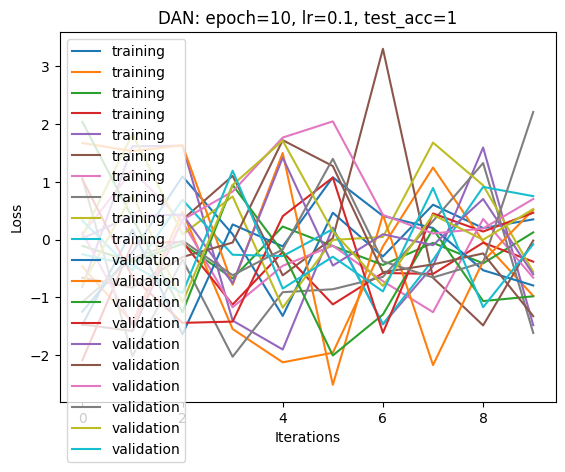

In [47]:
import matplotlib.pyplot as plt
import numpy as np

train_losses= np.random.randn(10, 10)
val_losses = np.random.randn(10, 10)
num_epochs=10
lr=0.1
test_acc=1
plt.plot(np.arange(len(train_losses)), train_losses, label="training")
plt.plot(np.arange(len(val_losses)), val_losses, label="validation")
plt.legend(loc="upper left")
plt.title(f"DAN: epoch={num_epochs}, lr={lr}, test_acc={test_acc}")
plt.xlabel("Iterations")
plt.ylabel("Loss")
# plt.savefig(f"DAN_Loss_epoch{num_epochs}_lr{lr}_testAcc{test_acc}.jpg")
# plt.close()
plt.show()
